## **Movie Review Sentiment RNN (IMDb Dataset)**

**Goal:**
Classify IMDb movie reviews as positive or negative using a simple RNN (LSTM) network.

### Load & Preprocess Data

In [1]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence

# Load dataset
vocab_size = 10000
maxlen = 200

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=vocab_size)


17464789/17464789 [==============================] - 5s 0us/step


In [2]:
# Pad sequences

x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)

print("Training data shape:", x_train.shape)

Training data shape: (25000, 200)


### Build RNN Model

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout

model = Sequential([
    Embedding(vocab_size, 128, input_length=maxlen),
    LSTM(64, dropout=0.2, recurrent_dropout=0.2),
    Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 200, 128)          1280000   
                                                                 
 lstm (LSTM)                 (None, 64)                49408     
                                                                 
 dense (Dense)               (None, 1)                 65        
                                                                 
Total params: 1,329,473
Trainable params: 1,329,473
Non-trainable params: 0
_________________________________________________________________


### Train & Evaluate

In [4]:
history = model.fit(x_train, y_train,
                    epochs=3,
                    batch_size=64,
                    validation_split=0.2)

test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")


Epoch 1/3
313/313 [==============================] - 299s 900ms/step - loss: 0.4573 - accuracy: 0.7786 - val_loss: 0.3507 - val_accuracy: 0.8534
Epoch 2/3
313/313 [==============================] - 266s 850ms/step - loss: 0.2618 - accuracy: 0.8992 - val_loss: 0.3315 - val_accuracy: 0.8704
Epoch 3/3
782/782 [==============================] - 50s 63ms/step - loss: 0.4736 - accuracy: 0.7817
Test Accuracy: 0.7817


### Visualize Accuracy

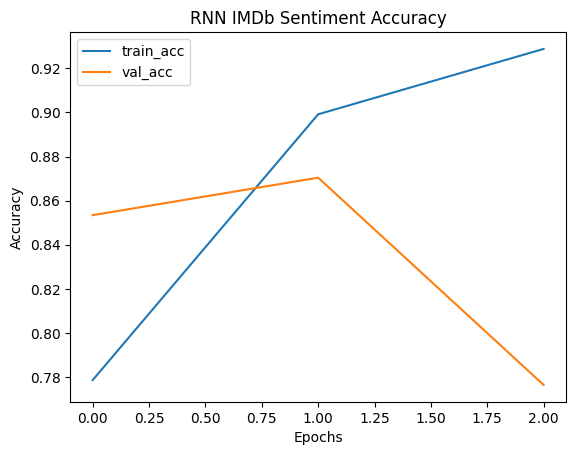

In [6]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label='train_acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.title("RNN IMDb Sentiment Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.savefig("../images/rnn_accuracy_curve.png", dpi=300)
plt.show()


### Save Model

In [7]:
model.save("../models/movie_sentiment_rnn.h5")